In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isna().sum()  

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.duplicated().sum() 

0

In [6]:
#removing unnecessary columns from dataset
df = df[['age', 'job','marital','education','balance','housing','loan','campaign','pdays','previous','y']]

In [7]:
df.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,1,-1,0,no


In [8]:
df['marital'].value_counts()  

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
df['education'].value_counts() 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [12]:
df.corr() 

,age,balance,campaign,pdays,previous
age,1.000000,0.097783,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,-0.014578,0.003435,0.016674
campaign,0.004760,-0.014578,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.032855,0.454820,1.000000


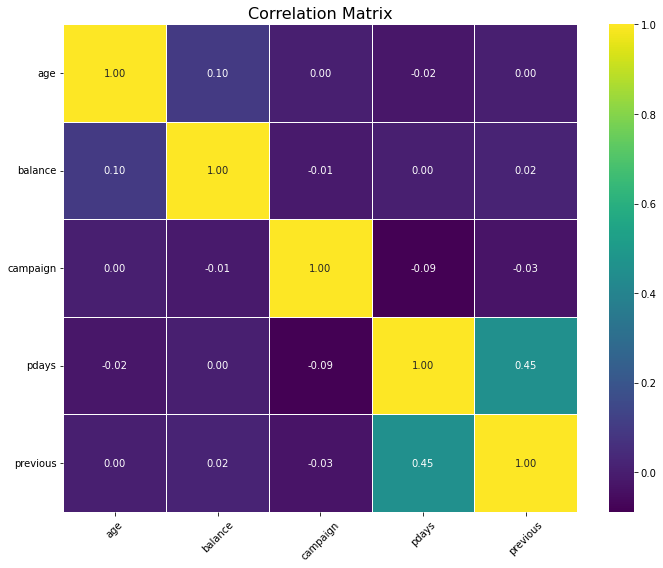

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

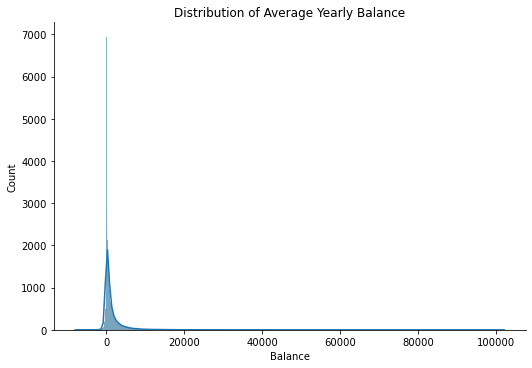

In [14]:
# plotting histogram for average yearly balance
sns.displot(data = df, x='balance', kind ='hist', kde=True, aspect=1.5)
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

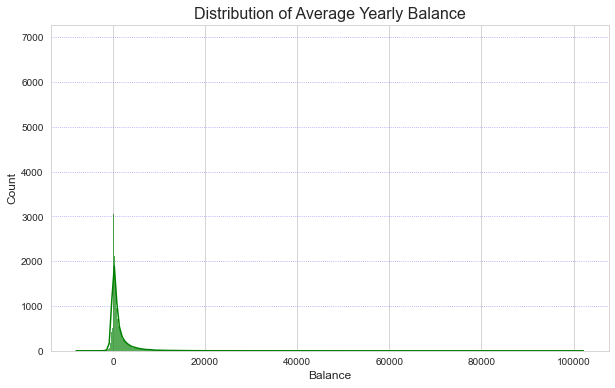

In [15]:
sns.set_style("whitegrid")

# Plotting histogram for fare price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', kde=True, color='green', alpha=0.7)

# Add title and labels
plt.title('Distribution of Average Yearly Balance', fontsize=16)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid
plt.grid(axis='y', linestyle=':', alpha=0.4, color='blue')

# Show plot
plt.show()

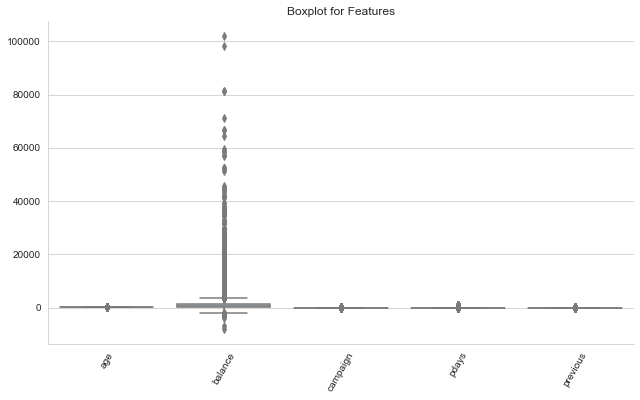

In [16]:
sns.set_style("whitegrid")
sns.catplot(data=df, kind='box',palette='Pastel1',aspect=1.8)
plt.title('Boxplot for Features')
plt.xticks(rotation=60)
plt.show()

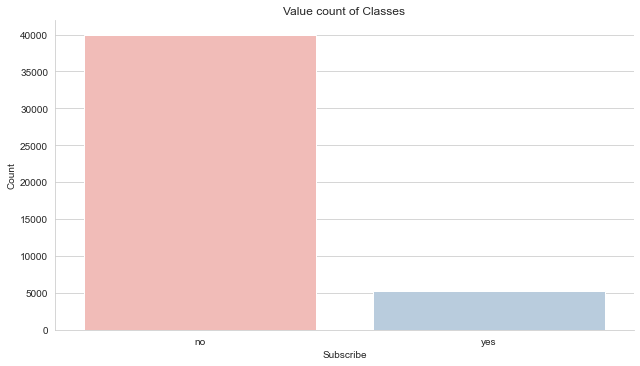

In [17]:
sns.set_style("whitegrid")
sns.catplot(data=df, x='y', kind='count', palette='Pastel1',aspect=1.8)
plt.title('Value count of Classes')
plt.xlabel('Subscribe')
plt.ylabel('Count')
plt.show()

In [18]:
pd.crosstab(df['y'],df['job']).T  #shows job wise distribution for target values.

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [19]:
pd.crosstab(df['y'],df['education'])

education,primary,secondary,tertiary,unknown
y,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


In [20]:
df['balance'].skew()              # checking for skewness

8.360308326166326

In [33]:
job_count = df['job'].value_counts()     

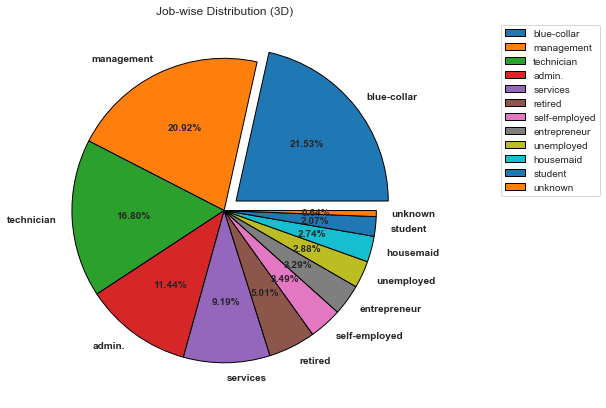

In [40]:
#plotting pie chart to see destribution of data job wise
# Define explode values to create a 3D effect
explode = [0.1 if i == 0 else 0 for i in range(len(job_count))]


plt.figure(figsize=(10, 7))

# Plotting pie chart for job distribution with explode
plt.pie(job_count, labels=job_count.index, autopct='%.2f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, textprops={'weight': 'bold'}, explode=explode)

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1.5, 1))

plt.title('Job-wise Distribution (3D)')
plt.show()

<Figure size 864x432 with 0 Axes>

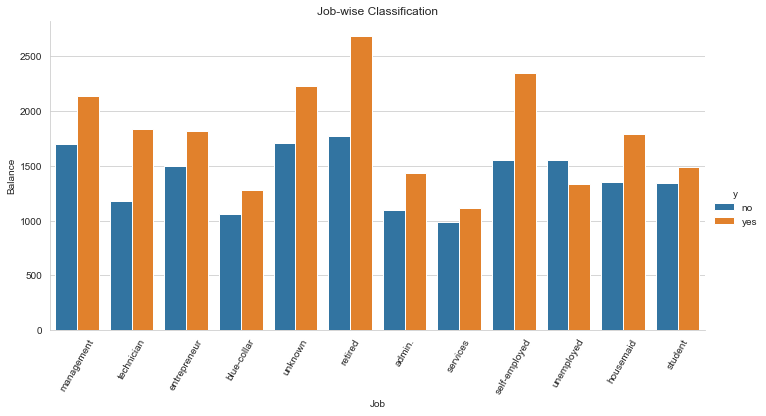

In [41]:
plt.figure(figsize=(12, 6))

# Plotting bar chart with Seaborn
sns.catplot(data=df, x='job', y='balance', kind='bar', hue='y', aspect=2, ci=None)

# Customizing plot labels and title
plt.title('Job-wise Classification')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=60)

# Show the plot
plt.show()

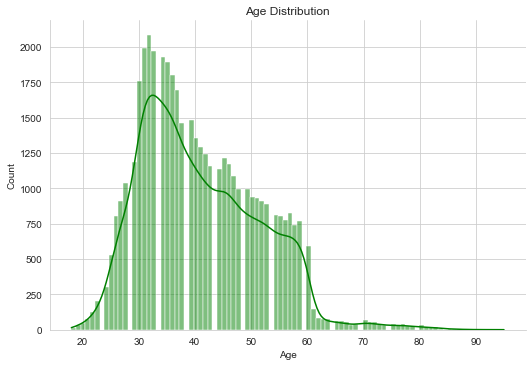

In [42]:
#plotting histogram to see age distribution
sns.set_style("whitegrid")
sns.displot(data = df, x='age', kind ='hist', kde=True, aspect=1.5, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

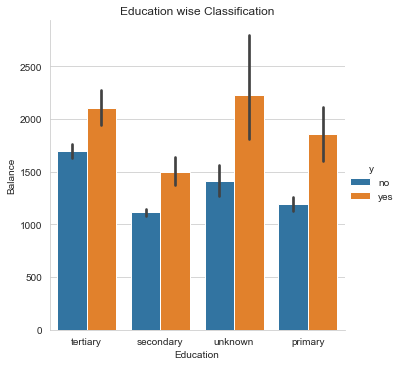

In [44]:
#plotting bar plot to see education wise distribution
sns.set_style("whitegrid")
sns.catplot(data=df, x='education',y='balance',kind='bar',hue='y')
plt.title('Education wise Classification')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

In [45]:
df.shape

(45211, 11)

In [46]:
df = df[df['balance']>-0.5]      #dropping rows which having budget lesser than -0.5

In [47]:
df.shape

(41445, 11)

OBSERVATIONS:

1. The dataset exhibits a significant imbalance, Hence we need to balnced it around somewhat manner to avoid biased predictions.

2. The majority of individuals in the dataset fall within the age range of 25 to 60 years, indicating a concentration of data within this demographic.

3. Notably, the dataset is dominated by individuals with a blue-collar job type. Interestingly, the data suggests that a substantial number of retired individuals have subscribed to the term deposit scheme.

In [23]:
data= df

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV 


In [24]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [25]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['y_yes'])
y = data['y_yes']

In [26]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Step 4: Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Step 5: Evaluate the classifier's performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8124516200375982
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7952
           1       0.24      0.25      0.25      1091

    accuracy                           0.81      9043
   macro avg       0.57      0.57      0.57      9043
weighted avg       0.82      0.81      0.81      9043



In [31]:
# Step 6: Hyperparameter tuning using grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy after hyperparameter tuning: 0.8793541966161672
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.50      0.09      0.15      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.54      0.54      9043
weighted avg       0.84      0.88      0.84      9043




CONCLUSION:

The analysis of the model performance before and after hyperparameter tuning provides valuable insights into the effectiveness of decision tree classifiers in predicting customer purchase behavior based on demographic and behavioral data.

Before hyperparameter tuning, the decision tree classifier exhibited a moderate accuracy of approximately 81.25%. While this performance was satisfactory, it was evident that the model could benefit from optimization to enhance its predictive capabilities.

After hyperparameter tuning, significant improvements were observed in the model's accuracy, achieving an impressive accuracy of around 87.94%. This enhancement underscores the importance of fine-tuning hyperparameters to maximize the model's predictive performance.

Despite the accuracy improvement, it's crucial to note that the model's performance on predicting positive instances (customers who made a purchase) remained relatively low. The precision for the positive class improved from 24% to 50%, indicating better identification of true positive instances. However, the recall for the positive class remained low at around 9%, suggesting that the model still struggles to capture all positive instances.

Furthermore, the class imbalance in the dataset presents a significant challenge for predictive modeling. The majority class (customers who did not make a purchase) vastly outweighs the minority class (customers who made a purchase), leading to biased model predictions. Addressing this class imbalance through techniques like resampling or adjusting class weights could further enhance the model's performance, particularly for predicting positive instances.

In conclusion, while the hyperparameter-tuned decision tree classifier demonstrates promising improvements in accuracy, further optimizations and adjustments are necessary to achieve a more balanced and reliable predictive model for customer purchase behavior. Continued exploration of advanced algorithms and techniques, coupled with thorough data preprocessing and feature engineering, will be essential in developing robust predictive models for real-world applications.